## Predicting Bitcoins' Price in 2027 using Machine Learning

In [70]:
# Import the libraries
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [48]:
# Downloading Bitcoin data from yfinance library
data = yf.download(tickers='BTC-USD', start='2017-01-01', end='2026-01-02')
data

/tmp/ipykernel_31718/1700179261.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers='BTC-USD', start='2017-01-01', end='2026-01-02')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2017-01-01,998.325012,1003.080017,958.698975,963.658020,147775008
2017-01-02,1021.750000,1031.390015,996.702026,998.617004,222184992
2017-01-03,1043.839966,1044.079956,1021.599976,1021.599976,185168000
2017-01-04,1154.729980,1159.420044,1044.400024,1044.400024,344945984
2017-01-05,1013.380005,1191.099976,910.416992,1156.729980,510199008
...,...,...,...,...,...
2025-12-28,87835.835938,87986.890625,87394.953125,87799.343750,15156557929
2025-12-29,87138.140625,90299.156250,86717.914062,87835.789062,48411625849


In [49]:
data = data.droplevel(level=1, axis=1)
data

Price,Close,High,Low,Open,Volume
Date,,,,,
2017-01-01,998.325012,1003.080017,958.698975,963.658020,147775008
2017-01-02,1021.750000,1031.390015,996.702026,998.617004,222184992
2017-01-03,1043.839966,1044.079956,1021.599976,1021.599976,185168000
2017-01-04,1154.729980,1159.420044,1044.400024,1044.400024,344945984
2017-01-05,1013.380005,1191.099976,910.416992,1156.729980,510199008
...,...,...,...,...,...
2025-12-28,87835.835938,87986.890625,87394.953125,87799.343750,15156557929
2025-12-29,87138.140625,90299.156250,86717.914062,87835.789062,48411625849
2025-12-30,88430.132812,89297.937500,86735.546875,87134.351562,35586356225


In [50]:
data = data.reset_index()
data = data.loc[:, ['Date', 'Close']]
data

Price,Date,Close
0,2017-01-01,998.325012
1,2017-01-02,1021.750000
2,2017-01-03,1043.839966
3,2017-01-04,1154.729980
4,2017-01-05,1013.380005
...,...,...
3283,2025-12-28,87835.835938
3284,2025-12-29,87138.140625
3285,2025-12-30,88430.132812
3286,2025-12-31,87508.828125


In [71]:
df = data[(data['Date'].dt.month == 1) & (data['Date'].dt.day == 1)]
df

Price,Date,Close
0,2017-01-01,998.325012
365,2018-01-01,13657.200195
730,2019-01-01,3843.520020
1095,2020-01-01,7200.174316
1461,2021-01-01,29374.152344
1826,2022-01-01,47686.812500
2191,2023-01-01,16625.080078
2556,2024-01-01,44167.332031
2922,2025-01-01,94419.757812
3287,2026-01-01,88731.984375


In [72]:
df = df.reset_index(drop=True)
df

Price,Date,Close
0,2017-01-01,998.325012
1,2018-01-01,13657.200195
2,2019-01-01,3843.520020
3,2020-01-01,7200.174316
4,2021-01-01,29374.152344
5,2022-01-01,47686.812500
6,2023-01-01,16625.080078
7,2024-01-01,44167.332031
8,2025-01-01,94419.757812
9,2026-01-01,88731.984375


In [73]:
# Ensure the date column is a datetime
df['Date']

0   2017-01-01
1   2018-01-01
2   2019-01-01
3   2020-01-01
4   2021-01-01
5   2022-01-01
6   2023-01-01
7   2024-01-01
8   2025-01-01
9   2026-01-01
Name: Date, dtype: datetime64[ns]

In [88]:
df.columns = ['Date', 'Price']
df

,Date,Price
0,2017-01-01,998.325012
1,2018-01-01,13657.200195
2,2019-01-01,3843.520020
3,2020-01-01,7200.174316
4,2021-01-01,29374.152344
5,2022-01-01,47686.812500
6,2023-01-01,16625.080078
7,2024-01-01,44167.332031
8,2025-01-01,94419.757812
9,2026-01-01,88731.984375


In [76]:
# Use the prophet library
from prophet import Prophet

In [77]:
# Prophet requires columns: ds (date) and y (BTC price)
full = df.copy() # Copying the data set

full.columns = ['ds', 'y'] # Creating the columns

model = Prophet() # Creating the model
model.fit(full) # Training the model

21:16:00 - cmdstanpy - INFO - Chain [1] start processing
21:16:00 - cmdstanpy - INFO - Chain [1] done processing


In [78]:
future = model.make_future_dataframe(periods=400)  # Getting 400 days into the future
forecast = model.predict(future) # Getting the price prediction for those future days

In [82]:
pred = forecast[forecast['ds'] == '2027-01-01']['yhat'].values[0] # Getting the prediction for January 1, 2027
pred

np.float64(82295.66052104587)

In [87]:
print(f"Predicted BTC Price on Jan. 1, 2027: ${pred:.2f}")  # Printing the price prediction for jan 1, 2027

Predicted BTC Price on Jan. 1, 2027: $82295.66


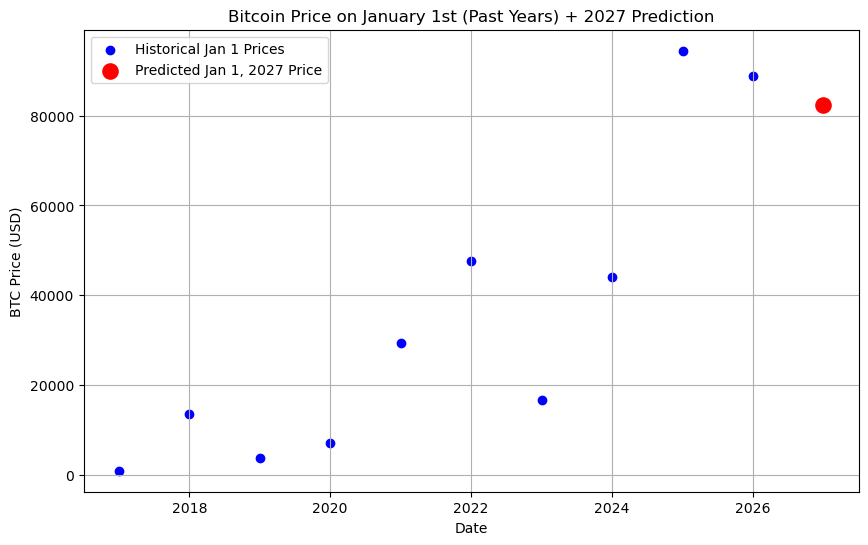

In [90]:
plt.figure(figsize=(10, 6)) # Create our figure
plt.scatter(df['Date'], df['Price'], color='blue', label='Historical Jan 1 Prices') # Create a scatter chart for the historical btc prices
plt.scatter(datetime(2027,1,1), pred, color='red', s=120, label='Predicted Jan 1, 2027 Price') # Create a scatter chart (or point) for the price prediction
plt.title('Bitcoin Price on January 1st (Past Years) + 2027 Prediction') # Making the chart pretty and readable
plt.xlabel('Date')
plt.ylabel('BTC Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

In [93]:
row = forecast[forecast['ds'] == '2027-01-01'] # Get the forecast for Jan 1, 2027

predicted_price = row['yhat'].values[0] # Getting the predicted value
lower = row['yhat_lower'].values[0] # Getting the lower predicted value
upper = row['yhat_upper'].values[0] # Getting the higher predicted value
# Printing the evaluation to the screen
print(f"Predicted Price: ${predicted_price:.2f}")
print(f"95% Confidence Interval: ${lower:.2f} --> ${upper:.2f}")

Predicted Price: $82295.66
95% Confidence Interval: $68908.02 --> $95562.87
